In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ortho_group
from procrustes import generalized
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
# Fly wings example (Klingenberg, 2015 | https://en.wikipedia.org/wiki/Procrustes_analysis)
arr1 = np.array([[588.0, 443.0], [178.0, 443.0], [56.0, 436.0], [50.0, 376.0], [129.0, 360.0], [15.0, 342.0], [92.0, 293.0], [79.0, 269.0], [276.0, 295.0], [281.0, 331.0], [785.0, 260.0], [754.0, 174.0], [405.0, 233.0], [386.0, 167.0], [466.0, 59.0]])
arr2 = np.array([[477.0, 557.0], [130.129, 374.307], [52.0, 334.0], [67.662, 306.953], [111.916, 323.0], [55.119, 275.854], [107.935, 277.723], [101.899, 259.73], [175.0, 329.0], [171.0, 345.0], [589.0, 527.0], [591.0, 468.0], [299.0, 363.0], [306.0, 317.0], [406.0, 288.0]])

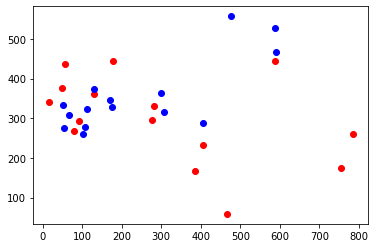

In [3]:
plt.scatter(arr1[:,0], arr1[:,1], c = 'red')
plt.scatter(arr2[:,0], arr2[:,1], c = 'blue')

In [5]:
# orthogonal Procrustes analysis with translation
result = generalized([arr1, arr2])

In [6]:
result

([array([[588., 443.],
         [178., 443.],
         [ 56., 436.],
         [ 50., 376.],
         [129., 360.],
         [ 15., 342.],
         [ 92., 293.],
         [ 79., 269.],
         [276., 295.],
         [281., 331.],
         [785., 260.],
         [754., 174.],
         [405., 233.],
         [386., 167.],
         [466.,  59.]]),
  array([[607.61924722, 410.58111307],
         [224.7218967 , 326.40367037],
         [138.70178198, 308.25608782],
         [146.63139743, 278.02432221],
         [193.55631911, 281.76256385],
         [126.2911954 , 251.36441164],
         [177.71221179, 239.16186722],
         [167.12126472, 223.41343285],
         [255.97316133, 270.82049531],
         [256.35888821, 287.30840648],
         [707.65539769, 351.95715381],
         [693.93942022, 294.53875988],
         [384.54995019, 270.72372597],
         [379.10206437, 224.5141973 ],
         [467.83291786, 170.0363519 ]])],
 3.513902016216475e-26)

In [8]:
result[0][0]

array([[588., 443.],
       [178., 443.],
       [ 56., 436.],
       [ 50., 376.],
       [129., 360.],
       [ 15., 342.],
       [ 92., 293.],
       [ 79., 269.],
       [276., 295.],
       [281., 331.],
       [785., 260.],
       [754., 174.],
       [405., 233.],
       [386., 167.],
       [466.,  59.]])

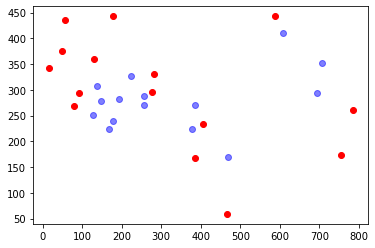

In [9]:
import matplotlib.pyplot as plt
plt.scatter(result[0][0][:,0], result[0][0][:,1], c='red')
plt.scatter(result[0][1][:,0], result[0][1][:,1], c= 'blue', alpha = 0.5)

In [26]:
transformed_matrix_2 = np.dot(result.new_a, result.t)
transformed_matrix_2

array([[ 0.16797974,  0.2576163 ],
       [-0.17330864,  0.0600013 ],
       [-0.27148883, -0.00462809],
       [-0.24756402, -0.05746466],
       [-0.17409177, -0.03270619],
       [-0.26031081, -0.10263619],
       [-0.17259779, -0.10631125],
       [-0.17185142, -0.13255495],
       [-0.0203982 , -0.01596067],
       [-0.0335877 ,  0.01641605],
       [ 0.42016841,  0.20023675],
       [ 0.43581463,  0.11370781],
       [ 0.11686603, -0.00539371],
       [ 0.13286142, -0.06949058],
       [ 0.25150896, -0.12083191]])

In [27]:
rot = result.t
z = np.zeros((2,1))
rot = np.append(rot, z, axis = 1) 
rot = np.append(rot, [[0,0,0]], axis=0)
# rot = np.append(rot, [[0,0,0]], axis = 1)
rot

array([[ 0.8653966 ,  0.50108754,  0.        ],
       [-0.50108754,  0.8653966 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [28]:
from scipy.spatial.transform import Rotation   

## first transform the matrix to euler angles
r =  Rotation.from_matrix(rot)
angles = r.as_euler("zyx",degrees=True)

In [29]:
angles

array([-40.30531127,   0.        ,   0.        ])